# Gaussian Naive Bayes Classifier

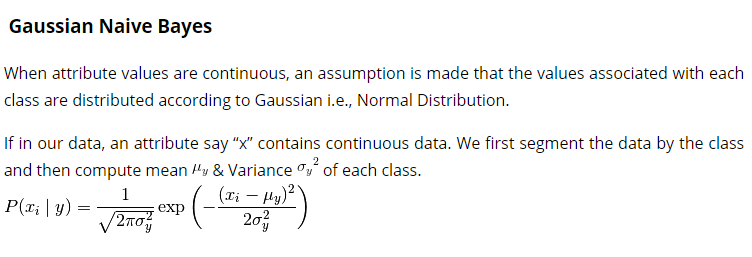

## AIM

----

## Data

- This problem is comprised of 768 observations of medical details for Pima indians patents. 

- All patients are women aged 21 or older. All attributes are numeric, and their units vary from attribute to attribute.

- Each record has a class value that indicates whether the patient suffered an onset of diabetes within 5 years of when the measurements were taken Yes(1) or not(0).

- A good prediction accuracy is 70%-76%.

## Imports

In [92]:
import math
import random
import numpy as np
import pandas as pd

import sklearn
from sklearn.utils import shuffle

## Dataset

In [406]:
df = pd.read_csv('Data/data_5_2_pima-indians-diabetes.data.csv')
df.head()

,Level,Iron_content,Calcium_content,Vitamins_deficiency,Beta_nagative,Beta_postive,Blood_workout,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### OPTIONAL: Standardisation of DF

In [513]:
# def standardisation(df):

#     df_std = df.copy()
#     for feature in ['Level', 'Iron_content', 'Calcium_content', 'Vitamins_deficiency', 'Beta_nagative', 'Beta_postive', 'Blood_workout', 'Age']:
#         # x = (x - Mean)/Std
#         df_std[feature] = (df[feature] - df[feature].mean())/df[feature].std()
#     return df_std

# df = standardisation(df)

## Train-Test Split

In [408]:
df = shuffle(df).reset_index(drop=True)

train_size = 0.80

train_data = df[0 : int(train_size*len(df))]
test_data = df[int(train_size*len(df)) : ]

print len(train_data), "+", len(test_data), " = ", len(train_data) + len(test_data)

614 + 154  =  768


## Analysis

AIM: P(Class|X1,X2,X3,X4,X5,X6,X7,X8) = ?

Solution: 

    - We find out P(Class=1) and P(Class=0)
    - We find out P(Class=1|X1,X2,X3,X4,X5,X6,X7,X8)
    - We find out P(Class=0|X1,X2,X3,X4,X5,X6,X7,X8)
    
    And compare which P is greater, that will be the predicted class!

- Equations:
    
      1. P(C=1|X1..X8) = P(X_i|C=1) x P(C=1) / Sum
                       = P(X1|C=1) x P(X2|C=1)...P(X8|C=1) x P(C=1) / Sum{ P(X_i|C=1)xP(C=1) + P(X_i|C=0)xP(C=0) }
                       ~ P(X1|C=1) x P(X2|C=1)...P(X8|C=1) x P(C=1) / (Sum)
                     
      2. P(C=0|X1..X8) = P(X_i|C=0) x P(C=0) / Sum
                       = P(X1|C=0) x P(X2|C=0)...P(X8|C=0) x P(C=0) / Sum{ P(X_i|C=1)xP(C=1) + P(X_i|C=0)xP(C=0) }
                       ~ P(X1|C=0) x P(X2|C=0)...P(X8|C=0) x P(C=0) / (Sum)
                     
      3. Can ignore the (Sum)
    
      4. Find argmax{ P(C=1|X1..X8), P(C=0|X1..X8) }

#### Calcualte P(X|Class=1) and P(X|Class=0)

In [409]:
def prob_Feature_given_class(X, X_i, Class):
    
    # Finding, mean and std for P(X=value|Class=1)
    mean = train_data[train_data.Class == Class][X].mean()
    stdev = np.std(train_data[train_data.Class == Class][X])
    
    # Gaussian Distribution Equation for P(x):-
    P_X_i_Class = math.pow(np.e, -1*(X_i - mean)**2/(2*stdev**2)) / (stdev*np.sqrt(2*np.pi))
    
    return P_X_i_Class

#### Calcualte P(Class=1) and P(Class=0)

In [410]:
def prob_Class(Class):
    
    # Finding, P(Class=1) = n(Class=1)/Total n;  P(Class=0) = n(Class=0)/Total n
    P_Class = len(train_data[train_data.Class == Class])*1.0/len(train_data)
                  
    return P_Class

#### Forming Testing Sample which will be our input feature vector

In [411]:
Features = list(df.columns)
Features.remove('Class')
Features

['Level',
 'Iron_content',
 'Calcium_content',
 'Vitamins_deficiency',
 'Beta_nagative',
 'Beta_postive',
 'Blood_workout',
 'Age']

In [412]:
X_test = test_data[Features]
Y_test = test_data['Class']

#### Calcualte P(X = x_ij | Class = 1 or 0) to find Predicted Classes

In [414]:
Y_test_hat = []

# Picking entire ROW one at a time
for feature_vector in X_test.values:
    
    # Intialising big to 0, and randomly intialising Predicted_class to 1 or 0, in case Prob of both class comes to be 0
    big = 0
    big_class = random.choice(df.Class.unique())
    
    # Iterating for each class, P(X|Class=0) and P(X|Class=1)
    for class_ in df.Class.unique():
        
        likelihood_class_X, i = 1, 0
        
        # Calcuating P(X_i|Class):- Iterating over featur vector (ROW) for each X; X1, X2... X7
        for X in Features:  
            # print "P({}={}|Class={})".format(X, feature_vector[i], class_)
            likelihood_class_X *=  prob_Feature_given_class(X, feature_vector[i], class_)
            i+=1
        
        # Calculating P(X|Class) = Product[P(X_i|Class)] x P(Class)
        likelihood_class_X = likelihood_class_X * prob_Class(class_)
        
        # Storing the class with bigger Prob:- P(X|Class=1) > or < P(X|Class=0)
        if likelihood_class_X > big:
            big, big_class = likelihood_class_X, class_

    # Storing Predicted Classes
    Y_test_hat.append(big_class)

In [415]:
# Sample Output
Y_test_hat[:5]

[0, 1, 1, 0, 1]

#### Accuracy (When y_hat == y)

In [416]:
def calculate_accuracy(y_test, y_test_hat):
    score = []
    for index in range(len(test_data)):
        if list(Y_test)[index] == y_test_hat[index]:
            score.append(100)
        else:
            score.append(0)
    return score

#### Forming Accuracy Matrix

In [417]:
accurracy = pd.DataFrame({"Actual Class": Y_test,
                          "Predicted Class": Y_test_hat,
                          "Score": calculate_accuracy(Y_test, Y_test_hat)})
accurracy.head()

,Actual Class,Predicted Class,Score
614,0,0,100
615,1,1,100
616,0,1,0
617,1,0,0
618,0,1,0


In [418]:
print "Accuracy Score = {}%".format(accurracy.Score.mean())

Accuracy Score = 74.6753246753%


----

# Using sklearn in-built libraries...

## Imports

In [502]:
import sklearn
from sklearn.utils import shuffle

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB

## Dataset

In [503]:
df.head()

,Level,Iron_content,Calcium_content,Vitamins_deficiency,Beta_nagative,Beta_postive,Blood_workout,Age,Class
0,5,116,74,0,0,25.6,0.201,30,0
1,11,103,68,40,0,46.2,0.126,42,0
2,1,140,74,26,180,24.1,0.828,23,0
3,1,163,72,0,0,39.0,1.222,33,1
4,3,130,78,23,79,28.4,0.323,34,1


In [504]:
df = shuffle(df).reset_index(drop=True)

#### X, Y

In [505]:
X = df[Features]
Y = df['Class']

#### OPTIONAL: Standardisation (Only for X)

In [506]:
# def standardisation(X):

#     X_std = X.copy()
#     for feature in X.columns:
#         # x = (x - Mean)/Std
#         X_std[feature] = (X[feature] - X[feature].mean())/X[feature].std()
#     return X_std

# X = standardisation(X)

#### Train Test Split

In [507]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80)

print len(X_train), len(X_test)

614 154


In [508]:
X_train.head(2)

,Level,Iron_content,Calcium_content,Vitamins_deficiency,Beta_nagative,Beta_postive,Blood_workout,Age
454,1,189,60,23,846,30.1,0.398,59
26,1,116,70,28,0,27.4,0.204,21


In [509]:
Y_train[:2]

454    1
26     0
Name: Class, dtype: int64

#### Gaussian NB

In [510]:
Gaussian_NB = GaussianNB()
Gaussian_NB.fit(X_train, Y_train)

GaussianNB(priors=None)

In [511]:
Y_test_hat = Gaussian_NB.predict(X_test)

#### Accuracy Score

In [512]:
accuracy_score(Y_test, Y_test_hat)*100

77.272727272727266